# IBM Applied Data Science Capstone Project

### Business Problem
This project aimed to find the best neighborhood for opening a new mall in Denver, Colorado by
comparing the Toronto data set. Here are some questions that will be answered to decide the best neighborhood
for the new mall. 

1. Should the new mall be close to restaurants or more residential areas?
2. Should the new mall be in more multicultural neighborhoods?
3. Should the new mall be accessible with variety of public transportations?



### 1. Import libraries

These libraries below is required to complete this project:

In [125]:
import numpy as np 
import pandas as pd # For creating and manipulating data frames.
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns # For visualizing outcomes
import json #For importing JSON data

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


from sklearn.cluster import KMeans # import k-means from clustering stage

import folium # Python visualization to visualize the neighborhoods cluster distribution of using interactive map.

%matplotlib inline

print("Libraries imported.")

Libraries imported.


### 2. Scrap Denver neighborhoods data from Wikipedia into a DataFrame

### Data Sources

Neighborhood data will be scraped from the links below by using BeautifulSoup and Request library with Prettify function. 
Toronto: https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Toronto
Denver: https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Denver

In [24]:
data = requests.get("https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Denver").text

In [25]:
soup = BeautifulSoup(data, 'html.parser')

In [26]:
soup


<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of neighborhoods in Denver - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"03cd4977-02e6-45e7-9276-61d7ab9c7bc1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_neighborhoods_in_Denver","wgTitle":"List of neighborhoods in Denver","wgCurRevisionId":928725042,"wgRevisionId":928725042,"wgArticleId":3721952,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Neighborhoods in Denver","Lists of neighborhoods in U.S. cities"],"wgPageContentLanguage":"en","wgPageContentMode

In [27]:
neighborhoodList = [] # create an empty list and pull neighborhood names into that list.

In [28]:
# append the data into the list
for row in soup.find_all("div", class_="mw-parser-output")[0].findAll("li"):
    neighborhoodList.append(row.text)

In [29]:
neighborhoodList

['1 Central',
 '2 East',
 '3 North',
 '4 Northeast',
 '5 Northwest',
 '6 South',
 '7 Southeast',
 '8 Southwest',
 '9 West',
 '10 Non-official Neighborhoods',
 '11 See also',
 '12 References',
 '13 External links',
 'Baker',
 'Capitol Hill',
 'Central Business District',
 'Cherry Creek',
 'Cheesman Park',
 'City Park',
 'Congress Park',
 'City Park West',
 'Civic Center',
 'Country Club',
 'Lincoln Park',
 'North Capitol Hill',
 'Speer',
 'Union Station',
 'Belcaro',
 'Cory-Merrill',
 'East Colfax',
 'Hale',
 'Hilltop',
 'Indian Creek',
 'Lowry',
 'Montclair',
 'Park Hill',
 'Virginia Village',
 'Washington Virginia Vale',
 'Windsor',
 'Clayton',
 'Cole',
 'Elyria-Swansea',
 'Five Points',
 'Globeville',
 'North Park Hill',
 'South Park Hill',
 'Skyland',
 'Whittier',
 'Denver International Airport',
 'Gateway / Green Valley Ranch',
 'Montbello',
 'Northeast Park Hill',
 'Stapleton',
 'Auraria',
 'Berkeley',
 'Chaffee Park',
 'Highland',
 'Jefferson Park',
 'Regis',
 'Sloan Lake',
 'Sun

### After this step I need to clean my data. My neighborhood list contains some other text at the beginning of the list and at the end.

In [30]:
df = pd.DataFrame(neighborhoodList)

In [31]:
df.columns = ['Neighborhood']

In [32]:
df.head(20)

,Neighborhood
0,1 Central
1,2 East
2,3 North
3,4 Northeast
4,5 Northwest
5,6 South
6,7 Southeast
7,8 Southwest
8,9 West
9,10 Non-official Neighborhoods


In [33]:
df.drop(df.index[0:13], inplace = True)

In [34]:
df.head()

,Neighborhood
13,Baker
14,Capitol Hill
15,Central Business District
16,Cherry Creek
17,Cheesman Park


In [35]:
neigborhoods = []
for i in df['Neighborhood'].to_list():
    neigborhoods.append(i)
#neigborhoods.append(print(df['Neighborhood'].to_list())

In [36]:
df.reset_index(drop=True, inplace= True)

In [37]:
df.tail(20)

,Neighborhood
78,Westwood
79,"Alamo Placita — A historic district, part of t..."
80,Burns Brentwood
81,Crestmoor
82,Curtis Park
83,Golden Triangle — An area which incorporates m...
84,Hampden Heights
85,"LoDo — Original settlement of Denver, with man..."
86,Mayfair
87,Parkfield


In [38]:
df.drop(df.index[79:98], inplace=True)

In [39]:
df.tail()

,Neighborhood
74,Sun Valley
75,Valverde
76,Villa Park
77,West Colfax
78,Westwood


In [40]:
df.shape

(79, 1)

In [41]:
df

,Neighborhood
0,Baker
1,Capitol Hill
2,Central Business District
3,Cherry Creek
4,Cheesman Park
...,...
74,Sun Valley
75,Valverde
76,Villa Park
77,West Colfax


In [42]:
neigborhoods

['Baker',
 'Capitol Hill',
 'Central Business District',
 'Cherry Creek',
 'Cheesman Park',
 'City Park',
 'Congress Park',
 'City Park West',
 'Civic Center',
 'Country Club',
 'Lincoln Park',
 'North Capitol Hill',
 'Speer',
 'Union Station',
 'Belcaro',
 'Cory-Merrill',
 'East Colfax',
 'Hale',
 'Hilltop',
 'Indian Creek',
 'Lowry',
 'Montclair',
 'Park Hill',
 'Virginia Village',
 'Washington Virginia Vale',
 'Windsor',
 'Clayton',
 'Cole',
 'Elyria-Swansea',
 'Five Points',
 'Globeville',
 'North Park Hill',
 'South Park Hill',
 'Skyland',
 'Whittier',
 'Denver International Airport',
 'Gateway / Green Valley Ranch',
 'Montbello',
 'Northeast Park Hill',
 'Stapleton',
 'Auraria',
 'Berkeley',
 'Chaffee Park',
 'Highland',
 'Jefferson Park',
 'Regis',
 'Sloan Lake',
 'Sunnyside',
 'West Highland',
 'College View / South Platte',
 'Overland',
 'Platt Park',
 'Rosedale',
 'University',
 'University Hills',
 'University Park',
 'Washington Park',
 'Washington Park West',
 'Wellshire',

### 3. Get the geographical coordinates


In this step, I will create fuction to get langtitude and latitude coordinations by geocoder. In order to do this one by one, I create a fuction with a loop, which will collect all coordinations of Neighborhoods in Python iterator. 

In [43]:
# define a function to get coordinates
def get_latlng(neighborhoods):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Denver,Colorado'.format(neighborhoods))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [404]:
coords = [ get_latlng(neighborhoods) for neighborhoods in df["Neighborhood"].to_list() ]

In [48]:
coords

[[39.71117000000004, -104.99208999999996],
 [39.733700000000056, -104.97928999999999],
 [39.743670000000066, -104.99066999999997],
 [39.717820000000074, -104.94882999999999],
 [39.72911000000005, -104.96816999999999],
 [39.74379000000005, -104.94824999999997],
 [39.73359000000005, -104.95000999999996],
 [39.74545000000006, -104.96719999999999],
 [39.73526000000004, -104.99057999999997],
 [39.721960000000024, -104.96551999999997],
 [39.72896000000003, -105.00215999999995],
 [39.74404000000004, -104.98107999999996],
 [39.71933000000007, -104.97997999999995],
 [39.753490000000056, -104.99887999999999],
 [39.70384000000007, -104.94973999999996],
 [39.691140000000075, -104.95060999999998],
 [39.74126000000007, -104.89399999999995],
 [39.732710000000054, -104.93041999999997],
 [39.71861000000007, -104.92459999999994],
 [37.17945000000003, -107.87672999999995],
 [39.7162336346815, -104.90808156031348],
 [39.73166000000003, -104.91336999999999],
 [39.60468519832476, -105.09517419818971],
 [39.

In the step, I create a data frame with the coordinations list on my hand. Then I will pass these columns to my data frame and match them with the neighborhoods.

In [51]:
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
df_coords.head()

,Latitude,Longitude
0,39.71117,-104.99209
1,39.73370,-104.97929
2,39.74367,-104.99067
3,39.71782,-104.94883
4,39.72911,-104.96817


In [52]:
df['Latitude'] = df_coords['Latitude']
df['Longitude'] = df_coords['Longitude']

In [53]:
print(df.shape)

(79, 3)


In [54]:
df.to_csv("denver_neighborhoods.csv", index=False) # I saved my df as csv file. 

### 4. Create a map of Denver with neighborhoods superimposed on top

At that point I will create a Denver map showing all the neighborhoods.

In [55]:
# get the coordinates of Denver, Colorado
address = 'Denver, Colorado'

geolocator = Nominatim(user_agent="myApp")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Denver, Colorado {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Denver, Colorado 39.7392364, -104.9848623.


In [56]:
# create map of Denver using latitude and longitude values 
map_denver = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhoods in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhoods)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_denver)  
    
map_denver

In [57]:
map_denver.save('map_denver.html')

### 5. Use the Foursquare API to explore the neighborhoods

At that pIoint, you need to enter your Foursquare Developer CLIENT_ID and CLIENT_SECRET. I will remove my information because of the confidenciality converns.

In [ ]:
# define Foursquare Credentials and Version
CLIENT_ID = 'your Foursquare ID' # your Foursquare ID
CLIENT_SECRET = 'your Foursquare Secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Now, let's get the top 100 venues that are within a radius of 2000 meters.

In [62]:
radius = 2000
LIMIT = 100

venues = []

for lat, long, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()['response']['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [63]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head(10)

(6820, 7)


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Baker,39.71117,-104.99209,Denver Biscuit Company,39.713770,-104.987778,Breakfast Spot
1,Baker,39.71117,-104.99209,Stranahan's Colorado Whiskey,39.712253,-104.998576,Distillery
2,Baker,39.71117,-104.99209,Livwell,39.708700,-104.987460,Marijuana Dispensary
3,Baker,39.71117,-104.99209,Mason at Alameda Station,39.711561,-104.992922,Residential Building (Apartment / Condo)
4,Baker,39.71117,-104.99209,Bardo Coffee House,39.712266,-104.987351,Coffee Shop
5,Baker,39.71117,-104.99209,Atomic Cowboy,39.713846,-104.987688,Bar
6,Baker,39.71117,-104.99209,MUTINY Information Cafe,39.716474,-104.987317,Bookstore
7,Baker,39.71117,-104.99209,Sweet Action Ice Cream,39.717544,-104.987352,Ice Cream Shop
8,Baker,39.71117,-104.99209,Illegal Pete's South Broadway,39.711768,-104.987187,Mexican Restaurant
9,Baker,39.71117,-104.99209,Lucile's Creole Cafe,39.711364,-104.982909,Cajun / Creole Restaurant


In [64]:
venues_df.groupby(["Neighborhood"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,
Athmar Park,87,87,87,87,87,87
Auraria,100,100,100,100,100,100
Baker,100,100,100,100,100,100
Barnum,76,76,76,76,76,76
Barnum West,61,61,61,61,61,61
...,...,...,...,...,...,...
West Colfax,100,100,100,100,100,100
West Highland,100,100,100,100,100,100
Westwood,71,71,71,71,71,71


In [65]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 302 uniques categories.


In [66]:
venues_df['VenueCategory'].value_counts()

Coffee Shop                388
Mexican Restaurant         348
Pizza Place                252
Park                       220
Brewery                    214
                          ... 
Basketball Court             1
Fruit & Vegetable Store      1
Campground                   1
Hunting Supply               1
Disc Golf                    1
Name: VenueCategory, Length: 302, dtype: int64

In [67]:
venues_df[venues_df['VenueCategory'] == 'Shopping Mall']

,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
218,Central Business District,39.74367,-104.99067,Denver Pavilions,39.743725,-104.990947,Shopping Mall
357,Cherry Creek,39.71782,-104.94883,Cherry Creek Shopping Center,39.716430,-104.953139,Shopping Mall
889,Civic Center,39.73526,-104.99058,Denver Pavilions,39.743725,-104.990947,Shopping Mall
1181,North Capitol Hill,39.74404,-104.98108,Denver Pavilions,39.743725,-104.990947,Shopping Mall
4323,College View / South Platte,39.66372,-105.02037,Riverpoint Shopping Center,39.652842,-105.013354,Shopping Mall
5044,Washington Park,39.70204,-104.96575,Cherry Creek Shopping Center,39.716430,-104.953139,Shopping Mall
5417,Hampden,39.66073,-104.88567,Outlets At Castle Rock,39.648033,-104.878787,Shopping Mall
6209,Barnum West,39.71815,-105.04510,Far East Center,39.710501,-105.025626,Shopping Mall
6817,Westwood,39.70621,-105.03990,Marlee Shopping Center,39.690290,-105.035791,Shopping Mall


### 6. Analyze By Neighborhood

I will create dummies for venues in Denver, so it will make it easier to analyze data.

In [68]:
# one hot encoding
denver_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
denver_onehot['Neighborhoods'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [denver_onehot.columns[-1]] + list(denver_onehot.columns[:-1])
denver_onehot = denver_onehot[fixed_columns]

print(denver_onehot.shape)
denver_onehot.head()

(6820, 303)


,Neighborhoods,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,Alternative Healer,...,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Zoo,Zoo Exhibit
0,Baker,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Baker,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Baker,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Baker,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Baker,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
denver_grouped = denver_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(denver_grouped.shape)
denver_grouped

(78, 303)


,Neighborhoods,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,Alternative Healer,...,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Zoo,Zoo Exhibit
0,Athmar Park,0.011494,0.0,0.011494,0.0,0.0,0.0,0.0,0.0,0.0,...,0.114943,0.011494,0.0,0.011494,0.00,0.00,0.011494,0.00,0.00,0.00
1,Auraria,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.01,0.00,0.000000,0.01,0.00,0.00
2,Baker,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010000,0.000000,0.0,0.010000,0.01,0.00,0.000000,0.01,0.00,0.00
3,Barnum,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.078947,0.013158,0.0,0.000000,0.00,0.00,0.013158,0.00,0.00,0.00
4,Barnum West,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.032787,0.000000,0.0,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,West Colfax,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.00,0.01,0.000000,0.01,0.00,0.00
74,West Highland,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.01,0.01,0.010000,0.02,0.00,0.00
75,Westwood,0.014085,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.112676,0.000000,0.0,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00
76,Whittier,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.00,0.00,0.000000,0.01,0.01,0.04


In [70]:
len(denver_grouped[denver_grouped["Shopping Mall"] > 0])

9

### 7. Cluster Neighborhoods


Here, I will cluster neighborhoods with Shopping Mall according to total number of Shopping Malls in that area. For that step, I will user KMeans cluster fuction that we imported at the beginning.

In [71]:
denver_mall = denver_grouped[["Neighborhoods","Shopping Mall"]]
denver_mall.head()

,Neighborhoods,Shopping Mall
0,Athmar Park,0.000000
1,Auraria,0.000000
2,Baker,0.000000
3,Barnum,0.000000
4,Barnum West,0.016393


Since our dataset is not very broad, I decided to use 3 clusters. 

In [72]:
# set number of clusters
kclusters = 3

denver_clustering = denver_mall.drop(["Neighborhoods"], axis = 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(denver_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 1])

In [73]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
denver_merged = denver_mall.copy()

# add clustering labels
denver_merged["Cluster Labels"] = kmeans.labels_

In [74]:
denver_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
denver_merged.head()

,Neighborhood,Shopping Mall,Cluster Labels
0,Athmar Park,0.000000,0
1,Auraria,0.000000,0
2,Baker,0.000000,0
3,Barnum,0.000000,0
4,Barnum West,0.016393,2


In [75]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
denver_merged = denver_merged.join(df.set_index("Neighborhood"), on="Neighborhood")

print(denver_merged.shape)
denver_merged.head() # check the last columns!

(78, 5)


,Neighborhood,Shopping Mall,Cluster Labels,Latitude,Longitude
0,Athmar Park,0.000000,0,39.70396,-105.01039
1,Auraria,0.000000,0,39.74575,-105.00997
2,Baker,0.000000,0,39.71117,-104.99209
3,Barnum,0.000000,0,39.71815,-105.03309
4,Barnum West,0.016393,2,39.71815,-105.04510


In [76]:
# sort the results by Cluster Labels
print(denver_merged.shape)
denver_merged.sort_values(["Cluster Labels"], inplace=True)
denver_merged

(78, 5)


,Neighborhood,Shopping Mall,Cluster Labels,Latitude,Longitude
0,Athmar Park,0.000000,0,39.70396,-105.01039
54,Skyland,0.000000,0,39.75758,-104.94990
53,Ruby Hill,0.000000,0,39.69106,-105.00874
52,Rosedale,0.000000,0,39.67491,-104.98185
51,Regis,0.000000,0,39.78742,-105.04099
...,...,...,...,...,...
31,Hampden,0.010101,1,39.66073,-104.88567
45,North Capitol Hill,0.010000,1,39.74404,-104.98108
4,Barnum West,0.016393,2,39.71815,-105.04510
18,College View / South Platte,0.017241,2,39.66372,-105.02037


Visualize the resulting clusters.

In [77]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.Accent(np.linspace(0, 1, len(ys)))
Accent = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(denver_merged['Latitude'], denver_merged['Longitude'], denver_merged['Neighborhood'], denver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=Accent[cluster-1],
        fill=True,
        fill_color=Accent[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [78]:
map_clusters.save('map_clusters.html')

### 8. Examine Clusters

In [79]:
clusterno = 0
print('Cluster {}: \n'.format(clusterno))
denver_merged.loc[denver_merged['Cluster Labels'] == clusterno]

Cluster 0: 



,Neighborhood,Shopping Mall,Cluster Labels,Latitude,Longitude
0,Athmar Park,0.0,0,39.70396,-105.01039
54,Skyland,0.0,0,39.75758,-104.94990
53,Ruby Hill,0.0,0,39.69106,-105.00874
52,Rosedale,0.0,0,39.67491,-104.98185
51,Regis,0.0,0,39.78742,-105.04099
...,...,...,...,...,...
26,Fort Logan,0.0,0,39.64154,-105.04649
25,Five Points,0.0,0,39.75920,-104.98760
24,Elyria-Swansea,0.0,0,39.78196,-104.95910
23,East Colfax,0.0,0,39.74126,-104.89400


In [80]:
clusterno = 1
print('Cluster {}: \n'.format(clusterno))
denver_merged.loc[denver_merged['Cluster Labels'] == clusterno]

Cluster 1: 



,Neighborhood,Shopping Mall,Cluster Labels,Latitude,Longitude
12,Cherry Creek,0.010000,1,39.71782,-104.94883
9,Central Business District,0.010000,1,39.74367,-104.99067
15,Civic Center,0.010000,1,39.73526,-104.99058
69,Washington Park,0.010000,1,39.70204,-104.96575
31,Hampden,0.010101,1,39.66073,-104.88567
45,North Capitol Hill,0.010000,1,39.74404,-104.98108


In [81]:
clusterno = 2
print('Cluster {}: \n'.format(clusterno))
denver_merged.loc[denver_merged['Cluster Labels'] == clusterno]

Cluster 2: 



,Neighborhood,Shopping Mall,Cluster Labels,Latitude,Longitude
4,Barnum West,0.016393,2,39.71815,-105.04510
18,College View / South Platte,0.017241,2,39.66372,-105.02037
75,Westwood,0.014085,2,39.70621,-105.03990


### 9. Feature Engineering

At that part, I will try to find correlations between data. If I find some relations I can use it for forcasting. In order to do that we are going to play with our data set. I will choose most  common venues in Denver but I am not going to take Neighborhoods because I want to see other businesses. This part is completely up to your decision making mechanism. 

In [82]:
most15_df = pd.DataFrame(denver_grouped.nunique().sort_values(ascending = False).head(15))

In [83]:
most15_df.head()

,0
Neighborhoods,78
Coffee Shop,37
Mexican Restaurant,37
Convenience Store,37
Pizza Place,37


In [85]:
denver_venues = denver_grouped.set_index('Neighborhoods')

In [86]:
denver_venues.head()

,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,Alternative Healer,American Restaurant,...,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Zoo,Zoo Exhibit
Neighborhoods,,,,,,,,,,,,,,,,,,,,,
Athmar Park,0.011494,0.0,0.011494,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.114943,0.011494,0.0,0.011494,0.00,0.0,0.011494,0.00,0.0,0.0
Auraria,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.060000,...,0.000000,0.000000,0.0,0.000000,0.01,0.0,0.000000,0.01,0.0,0.0
Baker,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.060000,...,0.010000,0.000000,0.0,0.010000,0.01,0.0,0.000000,0.01,0.0,0.0
Barnum,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.026316,...,0.078947,0.013158,0.0,0.000000,0.00,0.0,0.013158,0.00,0.0,0.0
Barnum West,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.032787,...,0.032787,0.000000,0.0,0.000000,0.00,0.0,0.000000,0.00,0.0,0.0


In [87]:
list(most15_df.drop('Neighborhoods').transpose().columns.values)

['Coffee Shop',
 'Mexican Restaurant',
 'Convenience Store',
 'Pizza Place',
 'Sandwich Place',
 'Bar',
 'Park',
 'Fast Food Restaurant',
 'Grocery Store',
 'Discount Store',
 'Brewery',
 'Gym / Fitness Center',
 'American Restaurant',
 'Pharmacy']

I found 15 most common venues in Denver now, I will create X and y values. If I find any correlation I will use statistical prediction models.

In [88]:
X = denver_venues[['Coffee Shop',
 'Mexican Restaurant',
 'Pizza Place',
 'Convenience Store',
 'Park',
 'Sandwich Place',
 'Fast Food Restaurant',
 'Grocery Store',
 'American Restaurant',
 'Discount Store',
 'Brewery',
 'Bar',
 'Bank',
 'Chinese Restaurant']]

In [89]:
y = denver_venues['Shopping Mall']

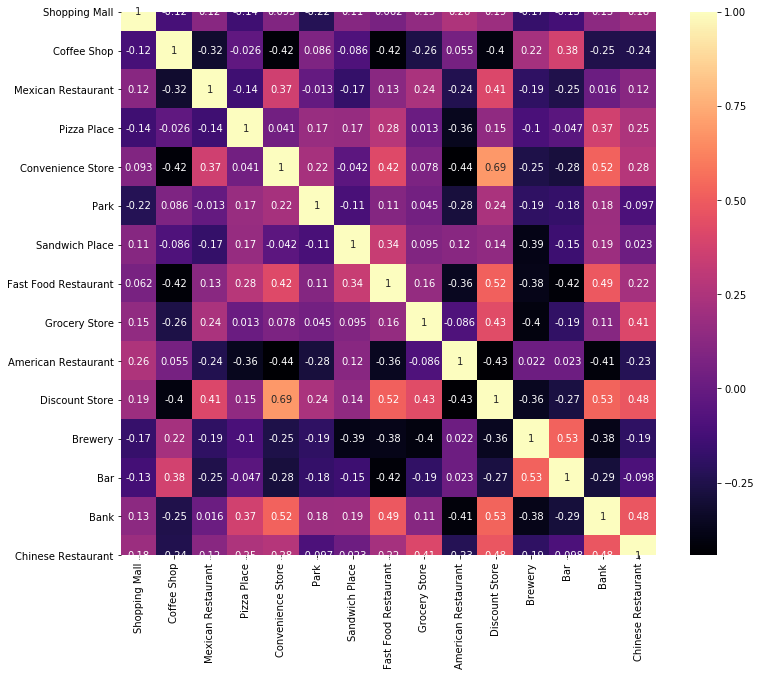

In [91]:
plt.figure(figsize=(12,10))
sns.heatmap(denver_venues[['Shopping Mall', 'Coffee Shop',
 'Mexican Restaurant',
 'Pizza Place',
 'Convenience Store',
 'Park',
 'Sandwich Place',
 'Fast Food Restaurant',
 'Grocery Store',
 'American Restaurant',
 'Discount Store',
 'Brewery',
 'Bar',
 'Bank',
 'Chinese Restaurant']].corr(), cmap = 'magma', annot=True )

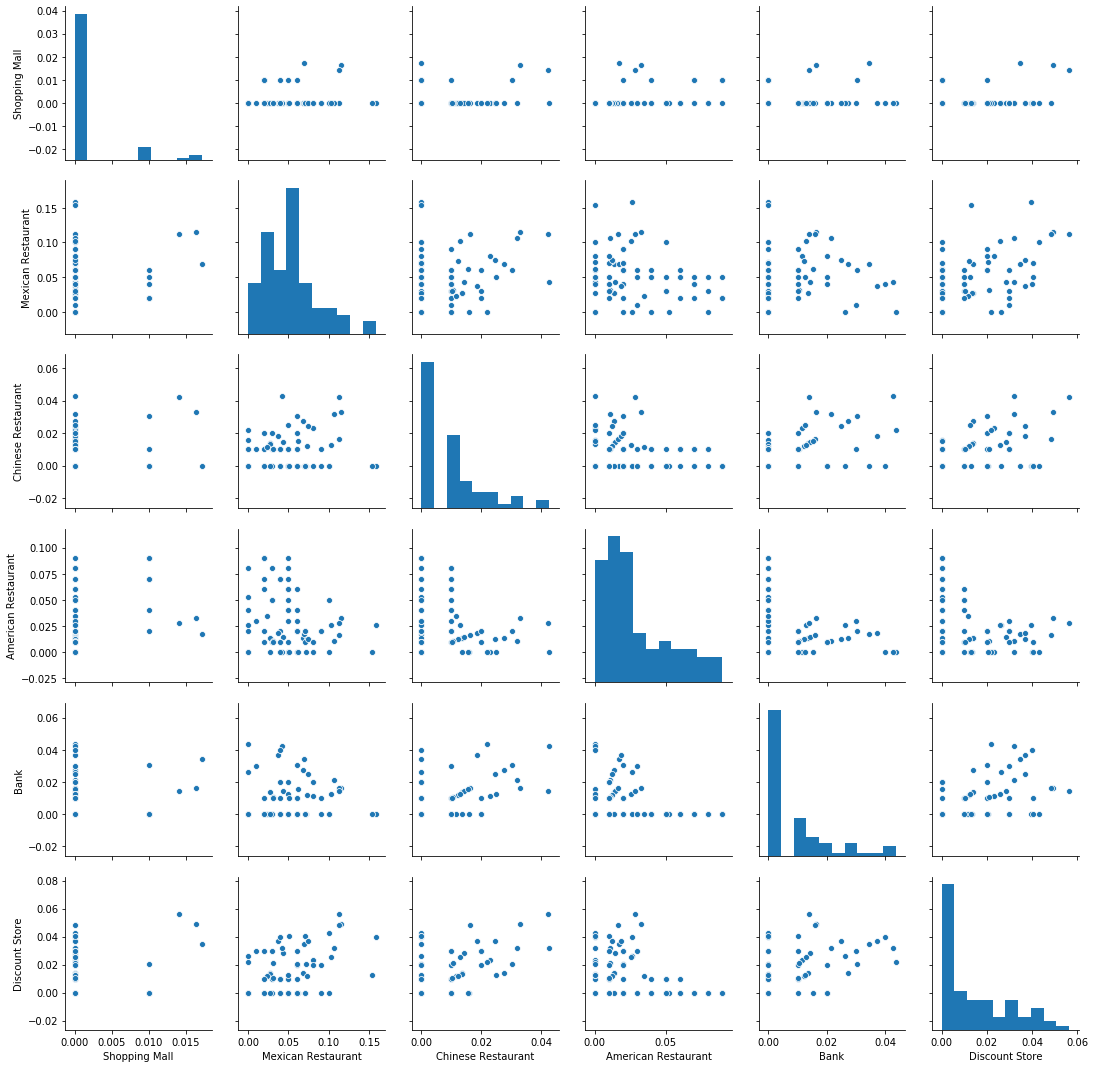

In [92]:
sns.pairplot(denver_venues[['Shopping Mall', 
                            'Mexican Restaurant', 
                            'Chinese Restaurant', 
                            'American Restaurant', 
                            'Bank', 
                            'Discount Store']])

According to graphs and heatmap, there is no significant correlation between Shopping Mall and other venues. Therefore, I will just examine Toronto data set and make decision.

### 10. TORONTO

I will follow the same steps as I did with Denver dataset since because I couldn't find any correlations in Denver dataset, I try to find it in Toronto. Otherwise, I will just use resemblance.

### 10.1. Segmenting And Clustering Toronto Neighborhoods 

Scrap Toronto Neigborhood list from Wikipedia.

In [129]:
source = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text
soup = BeautifulSoup(source, 'xml')

table = soup.find("table")
table_rows = table.tbody.find_all("tr")

res = []
for tr in table_rows:
    td = tr.find_all("td")
    row = [tr.text for tr in td]
    
    # Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
    if row != [] and row[1] != "Not assigned\n":
        # If a cell has a borough but a "Not assigned" neighborhood, then the neighborhood will be the same as the borough.
        if "Not assigned\n" in row[2]: 
            row[2] = row[1]
        res.append(row)

# Dataframe with 3 columns
toronto_df = pd.DataFrame(res, columns = ["PostalCode", "Borough", "Neighborhood"])
toronto_df.head()

,PostalCode,Borough,Neighborhood
0,M3A\n,North York\n,Parkwoods\n
1,M4A\n,North York\n,Victoria Village\n
2,M5A\n,Downtown Toronto\n,"Regent Park, Harbourfront\n"
3,M6A\n,North York\n,"Lawrence Manor, Lawrence Heights\n"
4,M7A\n,Downtown Toronto\n,"Queen's Park, Ontario Provincial Government\n"


In [130]:
toronto_df["PostalCode"] = toronto_df["PostalCode"].str.replace("\n","")
toronto_df["Borough"] = toronto_df["Borough"].str.replace("\n","")
toronto_df["Neighborhood"] = toronto_df["Neighborhood"].str.replace("\n","")

toronto_df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [131]:
toronto_df = toronto_df.groupby(["PostalCode", "Borough"])["Neighborhood"].apply(", ".join).reset_index()
toronto_df.head()

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [132]:
print("Shape: ", toronto_df.shape)

Shape:  (103, 3)


In [133]:
df_geo_coor = pd.read_csv("Geospatial_Coordinates.csv")
df_geo_coor.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [157]:
df_toronto = pd.merge(toronto_df, df_geo_coor, how='left', left_on = 'PostalCode', right_on = 'Postal Code')
# remove the "Postal Code" column
df_toronto.drop("Postal Code", axis=1, inplace=True)
df_toronto.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [158]:
address = "Toronto, ON"

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto city are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto city are 43.6534817, -79.3839347.


In [161]:
df_toronto.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


Here, again I need to hide my information. Please enter your own Foursquare Developer info.

In [ ]:
# define Foursquare Credentials and Version
CLIENT_ID = 'your Foursquare ID' # your Foursquare ID
CLIENT_SECRET = 'your Foursquare Secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [170]:
radius = 2000
LIMIT = 100

venues = []

for lat, long, neighborhood in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Borough']):
    
# create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]["groups"][0]["items"]
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [171]:
# convert the venues list into a new DataFrame
t_venues_df = pd.DataFrame(venues)

# define the column names
t_venues_df.columns = ['Borough', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(t_venues_df.shape)
t_venues_df.head(10)

(8621, 7)


,Borough,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Scarborough,43.806686,-79.194353,African Rainforest Pavilion,43.817725,-79.183433,Zoo Exhibit
1,Scarborough,43.806686,-79.194353,Toronto Pan Am Sports Centre,43.790623,-79.193869,Athletics & Sports
2,Scarborough,43.806686,-79.194353,Polar Bear Exhibit,43.823372,-79.185145,Zoo
3,Scarborough,43.806686,-79.194353,Orangutan Exhibit,43.818413,-79.182548,Zoo Exhibit
4,Scarborough,43.806686,-79.194353,Penguin Exhibit,43.819435,-79.185959,Zoo Exhibit
5,Scarborough,43.806686,-79.194353,Toronto Zoo,43.820582,-79.181551,Zoo
6,Scarborough,43.806686,-79.194353,Gorilla Exhibit,43.819080,-79.184235,Zoo Exhibit
7,Scarborough,43.806686,-79.194353,Harvey's,43.800020,-79.198307,Restaurant
8,Scarborough,43.806686,-79.194353,Australasia Pavillion,43.822563,-79.183286,Zoo Exhibit
9,Scarborough,43.806686,-79.194353,Canadiana exhibit,43.817962,-79.193374,Zoo Exhibit


At that point, I decided to use Boroughs in Toronto instead of Neighborhoods. Because Toronto is much more bigger then Denver, and I though that Boroughs are already clusters of Neighborhoods. And it will make it easier to categorize. This point is totally depends on your decision.

In [174]:
t_venues_df.groupby(["Borough"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Borough,,,,,,
Central Toronto,887,887,887,887,887,887
Downtown Toronto,1900,1900,1900,1900,1900,1900
East Toronto,500,500,500,500,500,500
East York,443,443,443,443,443,443
Etobicoke,804,804,804,804,804,804
Mississauga,100,100,100,100,100,100
North York,1839,1839,1839,1839,1839,1839
Scarborough,1150,1150,1150,1150,1150,1150
West Toronto,592,592,592,592,592,592


In [175]:
print('There are {} uniques categories.'.format(len(t_venues_df['VenueCategory'].unique())))

There are 330 uniques categories.


In [176]:
t_venues_df['VenueCategory'].value_counts()

Coffee Shop           714
Park                  300
Café                  288
Italian Restaurant    241
Pizza Place           233
                     ... 
Sake Bar                1
Gym Pool                1
Hotel Bar               1
Miscellaneous Shop      1
Beach Bar               1
Name: VenueCategory, Length: 330, dtype: int64

In [177]:
t_venues_df[t_venues_df['VenueCategory'] == 'Shopping Mall']

,Borough,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
115,Scarborough,43.763573,-79.188711,Morningside Crossing,43.770599,-79.185541,Shopping Mall
247,Scarborough,43.773136,-79.239476,Scarborough Town Centre,43.775277,-79.257413,Shopping Mall
366,Scarborough,43.744734,-79.239476,Cedarbrae Mall,43.758130,-79.228823,Shopping Mall
493,Scarborough,43.711112,-79.284577,Eglinton Square Shopping Centre,43.723413,-79.299617,Shopping Mall
793,Scarborough,43.750072,-79.295849,Victoria Terrace,43.742247,-79.312895,Shopping Mall
840,Scarborough,43.794200,-79.262029,Dragon Centre,43.791410,-79.272081,Shopping Mall
858,Scarborough,43.794200,-79.262029,Chartwell Shopping Centre 集友商場,43.797768,-79.270853,Shopping Mall
948,Scarborough,43.781638,-79.304302,Eaton Centre USA,43.783572,-79.304916,Shopping Mall
1191,North York,43.803762,-79.363452,Finch & Leslie Square 利是商場,43.791391,-79.367601,Shopping Mall
1235,North York,43.778517,-79.346556,CF Fairview Mall,43.777994,-79.343665,Shopping Mall


### 10.2.  Analyze By Borough

In [178]:
# one hot encoding
toronto_onehot = pd.get_dummies(t_venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Borough'] = t_venues_df['Borough'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

print(toronto_onehot.shape)
toronto_onehot.head()

(8621, 331)


,Borough,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,...,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,Scarborough,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Scarborough,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Scarborough,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Scarborough,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Scarborough,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [179]:
toronto_grouped = toronto_onehot.groupby(["Borough"]).mean().reset_index()

print(toronto_grouped.shape)
toronto_grouped

(10, 331)


,Borough,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,...,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,Central Toronto,0.000000,0.000000,0.000000,0.000000,0.004510,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.009019,0.000000,0.004510,0.000000,0.000000,0.019166,0.000000,0.000000
1,Downtown Toronto,0.000000,0.000000,0.000526,0.000526,0.008947,0.000000,0.000000,0.005263,0.000000,...,0.000000,0.000526,0.001053,0.000000,0.000526,0.000526,0.000000,0.018421,0.000000,0.000000
2,East Toronto,0.000000,0.000000,0.000000,0.000000,0.018000,0.000000,0.004000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004000,0.000000,0.000000
3,East York,0.000000,0.009029,0.000000,0.000000,0.011287,0.000000,0.000000,0.000000,0.000000,...,0.004515,0.000000,0.000000,0.000000,0.002257,0.000000,0.000000,0.006772,0.000000,0.000000
4,Etobicoke,0.000000,0.000000,0.000000,0.000000,0.007463,0.000000,0.000000,0.000000,0.000000,...,0.003731,0.000000,0.000000,0.000000,0.011194,0.001244,0.000000,0.003731,0.000000,0.000000
5,Mississauga,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,North York,0.000544,0.000544,0.000544,0.000000,0.008157,0.000000,0.000544,0.000000,0.001088,...,0.001631,0.000000,0.000000,0.000544,0.003263,0.003263,0.000000,0.000544,0.000000,0.000000
7,Scarborough,0.000000,0.000000,0.000000,0.000000,0.006957,0.000000,0.000000,0.000000,0.000000,...,0.002609,0.000000,0.000000,0.000000,0.006087,0.000870,0.001739,0.000870,0.001739,0.012174
8,West Toronto,0.000000,0.000000,0.000000,0.000000,0.010135,0.006757,0.001689,0.000000,0.000000,...,0.000000,0.001689,0.005068,0.000000,0.000000,0.000000,0.000000,0.003378,0.003378,0.000000
9,York,0.000000,0.000000,0.000000,0.000000,0.002463,0.000000,0.009852,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004926,0.000000,0.000000


In [180]:
len(toronto_grouped[toronto_grouped["Shopping Mall"] > 0])

8

As you see above, by using Boroughs, I get similar outcome with Denver.

### 10.3. Cluster Boroughs

In [182]:
toronto_mall = toronto_grouped[["Borough","Shopping Mall"]]
toronto_mall.head()

,Borough,Shopping Mall
0,Central Toronto,0.002255
1,Downtown Toronto,0.008421
2,East Toronto,0.000000
3,East York,0.004515
4,Etobicoke,0.009950


In [183]:
# set number of clusters
kclusters = 3

toronto_clustering = toronto_mall.drop(["Borough"], axis = 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 0, 1, 2, 0, 2, 1, 0, 0])

In [184]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
toronto_merged = toronto_mall.copy()

# add clustering labels
toronto_merged["Cluster Labels"] = kmeans.labels_

In [196]:
#df_toronto.drop(['PostalCode'], axis = 1, inplace = True)
df_toronto.head()

,Borough,Neighborhood,Latitude,Longitude
0,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,Scarborough,Woburn,43.770992,-79.216917
4,Scarborough,Cedarbrae,43.773136,-79.239476


In [205]:
toronto_merged.head()

,Borough,Shopping Mall,Cluster Labels,PostalCode,Neighborhood
0,Central Toronto,0.002255,0,M4N,Lawrence Park
2,East Toronto,0.000000,0,M4L,"India Bazaar, The Beaches West"
2,East Toronto,0.000000,0,M4M,Studio District
2,East Toronto,0.000000,0,M7Y,"Business reply mail Processing Centre, South C..."
5,Mississauga,0.000000,0,M7R,Canada Post Gateway Processing Centre


In [208]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.drop(['Neighborhood'], axis =1).join(df_toronto.set_index("Borough"), on="Borough")

print(toronto_merged.shape)
toronto_merged.head() # check the last columns!

(1563, 7)


,Borough,Shopping Mall,Cluster Labels,PostalCode,Neighborhood,Latitude,Longitude
0,Central Toronto,0.002255,0,M4N,Lawrence Park,43.728020,-79.388790
0,Central Toronto,0.002255,0,M4N,Davisville North,43.712751,-79.390197
0,Central Toronto,0.002255,0,M4N,"North Toronto West, Lawrence Park",43.715383,-79.405678
0,Central Toronto,0.002255,0,M4N,Davisville,43.704324,-79.388790
0,Central Toronto,0.002255,0,M4N,"Moore Park, Summerhill East",43.689574,-79.383160


In [209]:
# sort the results by Cluster Labels
print(toronto_merged.shape)
toronto_merged.sort_values(["Cluster Labels"], inplace=True)
toronto_merged

(1563, 7)


,Borough,Shopping Mall,Cluster Labels,PostalCode,Neighborhood,Latitude,Longitude
0,Central Toronto,0.002255,0,M4N,Lawrence Park,43.728020,-79.388790
0,Central Toronto,0.002255,0,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678
0,Central Toronto,0.002255,0,M4R,Davisville,43.704324,-79.388790
0,Central Toronto,0.002255,0,M4R,"Moore Park, Summerhill East",43.689574,-79.383160
0,Central Toronto,0.002255,0,M4R,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049
...,...,...,...,...,...,...,...
6,North York,0.010332,2,M3C,Downsview,43.761631,-79.520999
6,North York,0.010332,2,M3C,Victoria Village,43.725882,-79.315572
6,North York,0.010332,2,M3C,"Bedford Park, Lawrence Manor East",43.733283,-79.419750
6,North York,0.010332,2,M3C,"Willowdale, Newtonbrook",43.789053,-79.408493


In [211]:
# create map
toronto_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.Accent(np.linspace(0, 1, len(ys)))
Accent = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=Accent[cluster-1],
        fill=True,
        fill_color=Accent[cluster-1],
        fill_opacity=0.7).add_to(toronto_map_clusters)
       
toronto_map_clusters

In [212]:
toronto_map_clusters.save('map_clusters.html')

### 10.4. Examine Clusters

In [213]:
clusterno = 0
print('Cluster {}: \n'.format(clusterno))
toronto_merged.loc[toronto_merged['Cluster Labels'] == clusterno]

Cluster 0: 



,Borough,Shopping Mall,Cluster Labels,PostalCode,Neighborhood,Latitude,Longitude
0,Central Toronto,0.002255,0,M4N,Lawrence Park,43.728020,-79.388790
0,Central Toronto,0.002255,0,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678
0,Central Toronto,0.002255,0,M4R,Davisville,43.704324,-79.388790
0,Central Toronto,0.002255,0,M4R,"Moore Park, Summerhill East",43.689574,-79.383160
0,Central Toronto,0.002255,0,M4R,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049
...,...,...,...,...,...,...,...
8,West Toronto,0.001689,0,M6R,"High Park, The Junction South",43.661608,-79.464763
8,West Toronto,0.001689,0,M6S,"Dufferin, Dovercourt Village",43.669005,-79.442259
8,West Toronto,0.001689,0,M6R,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191
8,West Toronto,0.001689,0,M6R,"Little Portugal, Trinity",43.647927,-79.419750


In [214]:
clusterno = 1
print('Cluster {}: \n'.format(clusterno))
toronto_merged.loc[toronto_merged['Cluster Labels'] == clusterno]

Cluster 1: 



,Borough,Shopping Mall,Cluster Labels,PostalCode,Neighborhood,Latitude,Longitude
7,Scarborough,0.006957,1,M1R,"Clarks Corners, Tam O'Shanter, Sullivan",43.781638,-79.304302
3,East York,0.004515,1,M4C,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
3,East York,0.004515,1,M4H,"East Toronto, Broadview North (Old East York)",43.685347,-79.338106
3,East York,0.004515,1,M4H,Thorncliffe Park,43.705369,-79.349372
3,East York,0.004515,1,M4H,Leaside,43.709060,-79.363452
...,...,...,...,...,...,...,...
7,Scarborough,0.006957,1,M1G,Cedarbrae,43.773136,-79.239476
7,Scarborough,0.006957,1,M1G,"Malvern, Rouge",43.806686,-79.194353
7,Scarborough,0.006957,1,M1G,"Wexford, Maryvale",43.750072,-79.295849
7,Scarborough,0.006957,1,M1G,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497


In [215]:
clusterno = 2
print('Cluster {}: \n'.format(clusterno))
toronto_merged.loc[toronto_merged['Cluster Labels'] == clusterno]

Cluster 2: 



,Borough,Shopping Mall,Cluster Labels,PostalCode,Neighborhood,Latitude,Longitude
1,Downtown Toronto,0.008421,2,M5H,"University of Toronto, Harbord",43.662696,-79.400049
1,Downtown Toronto,0.008421,2,M5H,"St. James Town, Cabbagetown",43.667967,-79.367675
1,Downtown Toronto,0.008421,2,M5H,Church and Wellesley,43.665860,-79.383160
1,Downtown Toronto,0.008421,2,M5H,"Regent Park, Harbourfront",43.654260,-79.360636
1,Downtown Toronto,0.008421,2,M5H,St. James Town,43.651494,-79.375418
...,...,...,...,...,...,...,...
6,North York,0.010332,2,M3C,Downsview,43.761631,-79.520999
6,North York,0.010332,2,M3C,Victoria Village,43.725882,-79.315572
6,North York,0.010332,2,M3C,"Bedford Park, Lawrence Manor East",43.733283,-79.419750
6,North York,0.010332,2,M3C,"Willowdale, Newtonbrook",43.789053,-79.408493


# Featuer Engineering

In [216]:
t_most15_df = pd.DataFrame(toronto_grouped.nunique().sort_values(ascending = False).head(15))

In [217]:
t_most15_df.head()

,0
Ice Cream Shop,10
Mexican Restaurant,10
Gym,10
Gym / Fitness Center,10
Indian Restaurant,10


In [232]:
t_most15_df.transpose().columns.values

array(['Ice Cream Shop', 'Mexican Restaurant', 'Gym',
       'Gym / Fitness Center', 'Indian Restaurant', 'Italian Restaurant',
       'Japanese Restaurant', 'Juice Bar', 'Liquor Store',
       'Middle Eastern Restaurant', 'Skating Rink',
       'Paper / Office Supplies Store', 'Park', 'Pharmacy', 'Pizza Place'],
      dtype=object)

In [238]:
X = toronto_venues[['Shopping Mall', 'Ice Cream Shop', 'Mexican Restaurant', 'Gym',
       'Gym / Fitness Center', 'Indian Restaurant', 'Italian Restaurant',
       'Japanese Restaurant', 'Juice Bar', 'Liquor Store',
       'Middle Eastern Restaurant', 'Skating Rink',
       'Paper / Office Supplies Store', 'Park', 'Pharmacy', 'Pizza Place']]

In [239]:
y = toronto_venues['Shopping Mall']

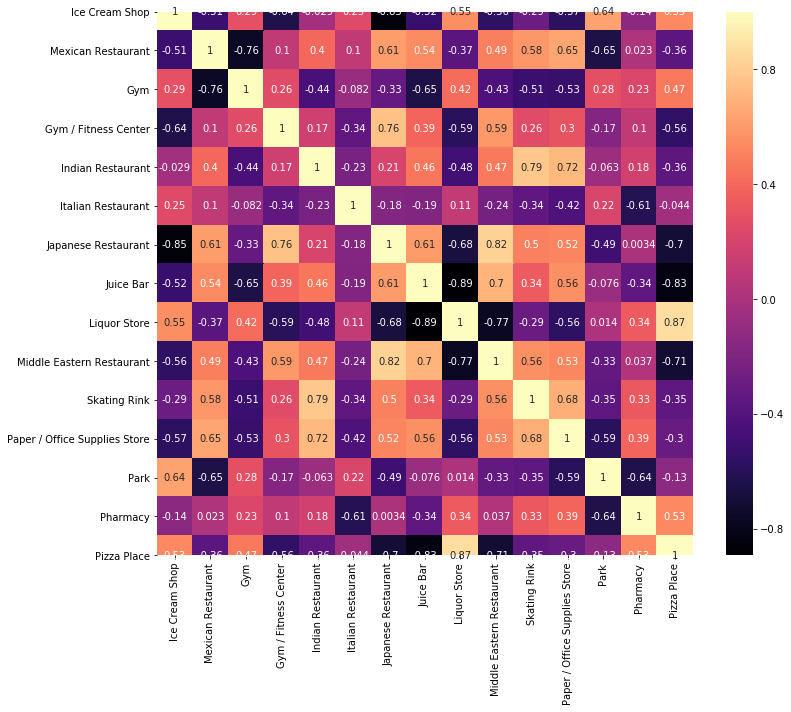

In [240]:
plt.figure(figsize=(12,10))
sns.heatmap(toronto_venues[['Ice Cream Shop', 'Mexican Restaurant', 'Gym',
       'Gym / Fitness Center', 'Indian Restaurant', 'Italian Restaurant',
       'Japanese Restaurant', 'Juice Bar', 'Liquor Store',
       'Middle Eastern Restaurant', 'Skating Rink',
       'Paper / Office Supplies Store', 'Park', 'Pharmacy', 'Pizza Place']].corr(), cmap = 'magma', annot=True )

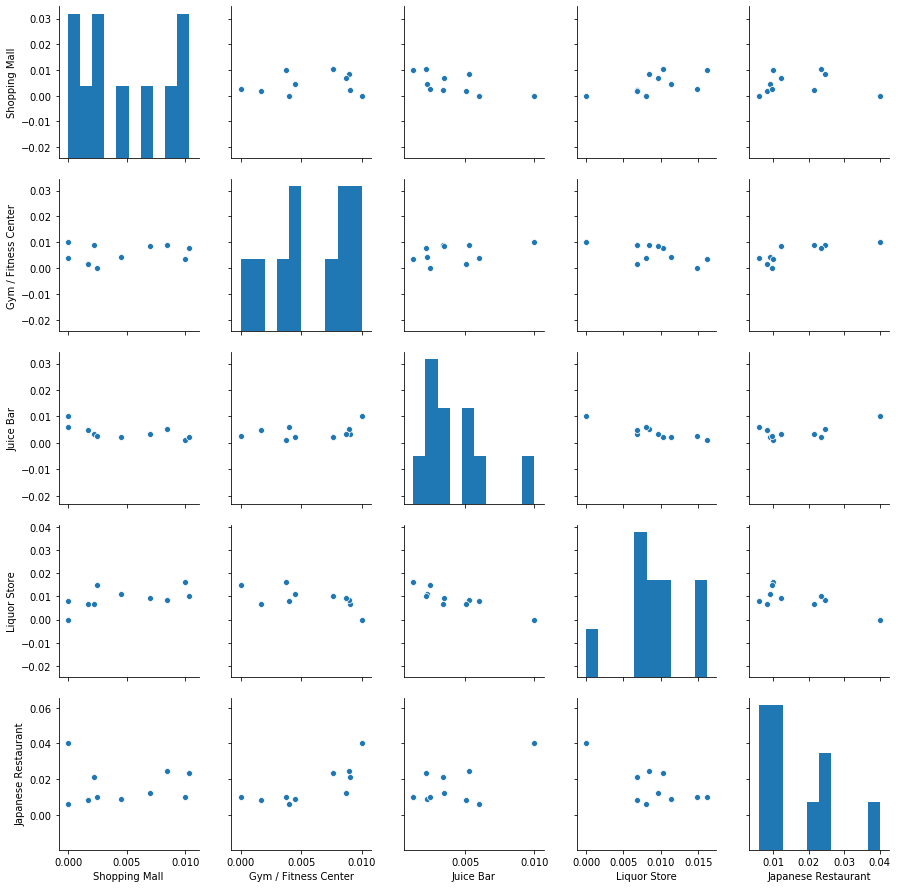

In [243]:
sns.pairplot(toronto_venues[['Shopping Mall', 
                            'Gym / Fitness Center', 
                            'Juice Bar', 
                            'Liquor Store', 
                            'Japanese Restaurant']])

Since I didn't get any significant correlations between Toronto variables, I decided to chose the most common ones. I will just use the highest negative or positive correlations. Which are Shopping Mall, Gym / Fitness Center, Juice Bar, Liquor Store, Japanese Restaurant.

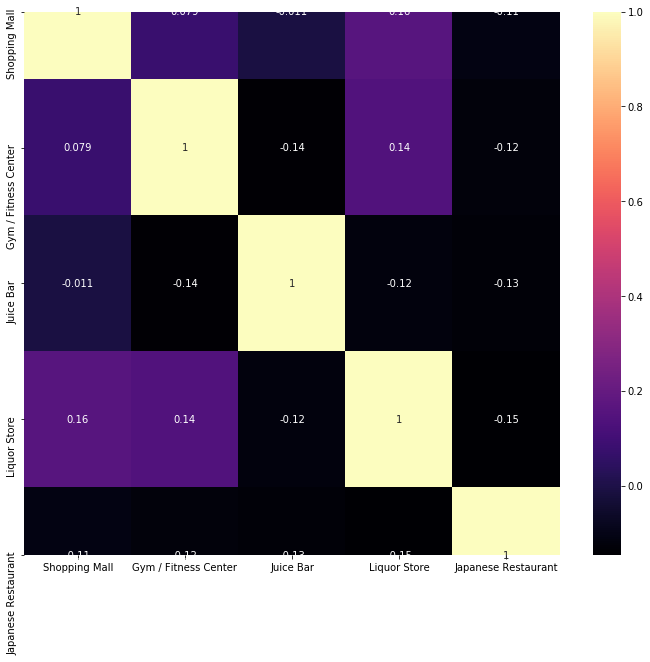

In [244]:
plt.figure(figsize=(12,10))
sns.heatmap(denver_venues[['Shopping Mall', 'Gym / Fitness Center', 
                            'Juice Bar', 
                            'Liquor Store', 
                            'Japanese Restaurant']].corr(), cmap = 'magma', annot=True )

According to this outcome, I decided to build a new Shopping Mall near the Gym/Fitness Centers. Because, I found the highest correlation with Liquor Store. But also I though that liquor store might be in the Shopping Mall as well. Then the second most correlated variable was Gym/Fitness Center.  

Building a Gym/Fitness Center near the Shopping Mall made much more sense for me. Because, Gym/Fitness Centers mostly adopted Subscription Revenue model. Which means that the clients are paying monthly and they make at least a year of contract with the Gym/Fitness Centers. 

One person with Gym/Fitness Center subsrition will come to Gym/Fitness Center at least twice a week. According to my marketing perspective, I would build a new Shopping Mall near the Gym/Fitness Centers where people regularly visit.

In [288]:
denver_merged

,Neighborhood,Shopping Mall,Cluster Labels,Latitude,Longitude
0,Athmar Park,0.000000,0,39.70396,-105.01039
54,Skyland,0.000000,0,39.75758,-104.94990
53,Ruby Hill,0.000000,0,39.69106,-105.00874
52,Rosedale,0.000000,0,39.67491,-104.98185
51,Regis,0.000000,0,39.78742,-105.04099
...,...,...,...,...,...
31,Hampden,0.010101,1,39.66073,-104.88567
45,North Capitol Hill,0.010000,1,39.74404,-104.98108
4,Barnum West,0.016393,2,39.71815,-105.04510
18,College View / South Platte,0.017241,2,39.66372,-105.02037


Let's find the Denver Neighborhoods with Gym/Fitness Centers.

In [312]:
arr = venues_df['Neighborhood'][venues_df['VenueCategory'] == 'Gym / Fitness Center'].unique()
gym_list = list(arr)
gym_list

['Capitol Hill',
 'Central Business District',
 'Cherry Creek',
 'Congress Park',
 'Civic Center',
 'Country Club',
 'Lincoln Park',
 'Belcaro',
 'Cory-Merrill',
 'East Colfax',
 'Hilltop',
 'Lowry',
 'Park Hill',
 'Virginia Village',
 'Washington Virginia Vale',
 'Windsor',
 'Cole',
 'Five Points',
 'Globeville',
 'North Park Hill',
 'South Park Hill',
 'Northeast Park Hill',
 'Chaffee Park',
 'University Hills',
 'Wellshire',
 'Goldsmith',
 'Hampden',
 'Hampden South',
 'Kennedy',
 'Southmoor Park',
 'Bear Valley',
 'Fort Logan',
 'Harvey Park',
 'Harvey Park South',
 'Athmar Park',
 'Barnum',
 'Barnum West',
 'Mar Lee',
 'Sun Valley',
 'Valverde',
 'Villa Park']

While doing that, I decided to chose the areas with the least number of Shopping Malls. Therefore, I will go with Cluster 0 neighborhoods.

In [326]:
clusterno = 0
print('Cluster {}: \n'.format(clusterno))
df_test = denver_merged.loc[denver_merged['Cluster Labels'] == clusterno]
df_test

Cluster 0: 



,Neighborhood,Shopping Mall,Cluster Labels,Latitude,Longitude
0,Athmar Park,0.0,0,39.70396,-105.01039
54,Skyland,0.0,0,39.75758,-104.94990
53,Ruby Hill,0.0,0,39.69106,-105.00874
52,Rosedale,0.0,0,39.67491,-104.98185
51,Regis,0.0,0,39.78742,-105.04099
...,...,...,...,...,...
26,Fort Logan,0.0,0,39.64154,-105.04649
25,Five Points,0.0,0,39.75920,-104.98760
24,Elyria-Swansea,0.0,0,39.78196,-104.95910
23,East Colfax,0.0,0,39.74126,-104.89400


In [335]:
cluster_list = list(df_test['Neighborhood'].unique())

In [342]:
candidate_list = []

for i in cluster_list:
    if i in gym_list:
        candidate_list.append(i)
print(candidate_list)

['Athmar Park', 'Park Hill', 'Northeast Park Hill', 'North Park Hill', 'Mar Lee', 'Lowry', 'Lincoln Park', 'South Park Hill', 'Wellshire', 'Washington Virginia Vale', 'Virginia Village', 'Villa Park', 'Valverde', 'University Hills', 'Sun Valley', 'Southmoor Park', 'Kennedy', 'Barnum', 'Bear Valley', 'Belcaro', 'Capitol Hill', 'Chaffee Park', 'Hilltop', 'Congress Park', 'Cory-Merrill', 'Cole', 'Harvey Park South', 'Harvey Park', 'Hampden South', 'Goldsmith', 'Country Club', 'Globeville', 'Windsor', 'Fort Logan', 'Five Points', 'East Colfax']


In [403]:
candidate_df = denver_merged.loc[denver_merged['Neighborhood'].isin(candidate_list)]
candidate_df.reset_index(drop = True, inplace = True)
candidate_df.to_csv('candidate_df.csv', index = True)

In [405]:
candidate_df

,Neighborhood,Shopping Mall,Cluster Labels,Latitude,Longitude
0,Athmar Park,0.0,0,39.703960,-105.010390
1,Park Hill,0.0,0,39.604685,-105.095174
2,Northeast Park Hill,0.0,0,39.774990,-104.922290
3,North Park Hill,0.0,0,39.756560,-104.924020
4,Mar Lee,0.0,0,39.689480,-105.039230
5,Lowry,0.0,0,39.716234,-104.908082
6,Lincoln Park,0.0,0,39.728960,-105.002160
7,South Park Hill,0.0,0,39.745620,-104.925210
8,Wellshire,0.0,0,39.667580,-104.951210
9,Washington Virginia Vale,0.0,0,39.703810,-104.914630


Let's create a map with Neighborhoods which have Gym/Fitness Centers.

In [366]:
# get the coordinates of Denver, Colorado
address = 'Denver, Colorado'

geolocator = Nominatim(user_agent="myApp")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Denver, Colorado {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Denver, Colorado 39.7392364, -104.9848623.


In [381]:
# create map of Denver using latitude and longitude values 
map_candidate = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhoods in zip(candidate_df['Latitude'], candidate_df['Longitude'], candidate_df['Neighborhood']):
    label = '{}'.format(neighborhoods)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_candidate)  
    
map_candidate

In [386]:
map_candidate.save('map_candidate.html')

In [408]:
candidate_df['Longitude'].mean()

-104.96972460440283

Here, since my Cluster 2, which contains higher numbers of Shopping Malls, located in West side of the city, I want to build a new Shopping Mall at the East side. In order to do that I found the mean of longitudes and I will chose right side of the mean point. 

In [432]:
east_candidates_df = candidate_df[candidate_df['Longitude'] > -104.96972460440283]
east_candidates_df.reset_index(drop = True, inplace = True)
east_candidates_df

,Neighborhood,Shopping Mall,Cluster Labels,Latitude,Longitude
0,Northeast Park Hill,0.0,0,39.774990,-104.922290
1,North Park Hill,0.0,0,39.756560,-104.924020
2,Lowry,0.0,0,39.716234,-104.908082
3,South Park Hill,0.0,0,39.745620,-104.925210
4,Wellshire,0.0,0,39.667580,-104.951210
5,Washington Virginia Vale,0.0,0,39.703810,-104.914630
6,Virginia Village,0.0,0,39.689330,-104.926150
7,University Hills,0.0,0,39.667460,-104.933010
8,Southmoor Park,0.0,0,39.645080,-104.917380
9,Kennedy,0.0,0,39.659450,-104.858980


Let's create a mapand see

In [433]:
# create map of Denver using latitude and longitude values 
map_candidate_east = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhoods in zip(east_candidates_df['Latitude'], east_candidates_df['Longitude'], east_candidates_df['Neighborhood']):
    label = '{}'.format(neighborhoods)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_candidate_east)  
    
map_candidate_east

In [436]:
east_candidates_df.to_csv('east_candidates_df.csv')
east_candidates_df['Neighborhood'] # I saved my df in order to use with tableau

0          Northeast Park Hill
1              North Park Hill
2                        Lowry
3              South Park Hill
4                    Wellshire
5     Washington Virginia Vale
6             Virginia Village
7             University Hills
8               Southmoor Park
9                      Kennedy
10                     Belcaro
11                     Hilltop
12               Congress Park
13                Cory-Merrill
14                        Cole
15               Hampden South
16                   Goldsmith
17                Country Club
18                     Windsor
19                 East Colfax
Name: Neighborhood, dtype: object

For the further desicion, I will use some BI tools to visiulize the data and make a decision. I will use Tableau Data Analysis tool for comparing populations of these neighborhoods. I will collect population information of these neighborhoods from https://www.city-data.com/ .

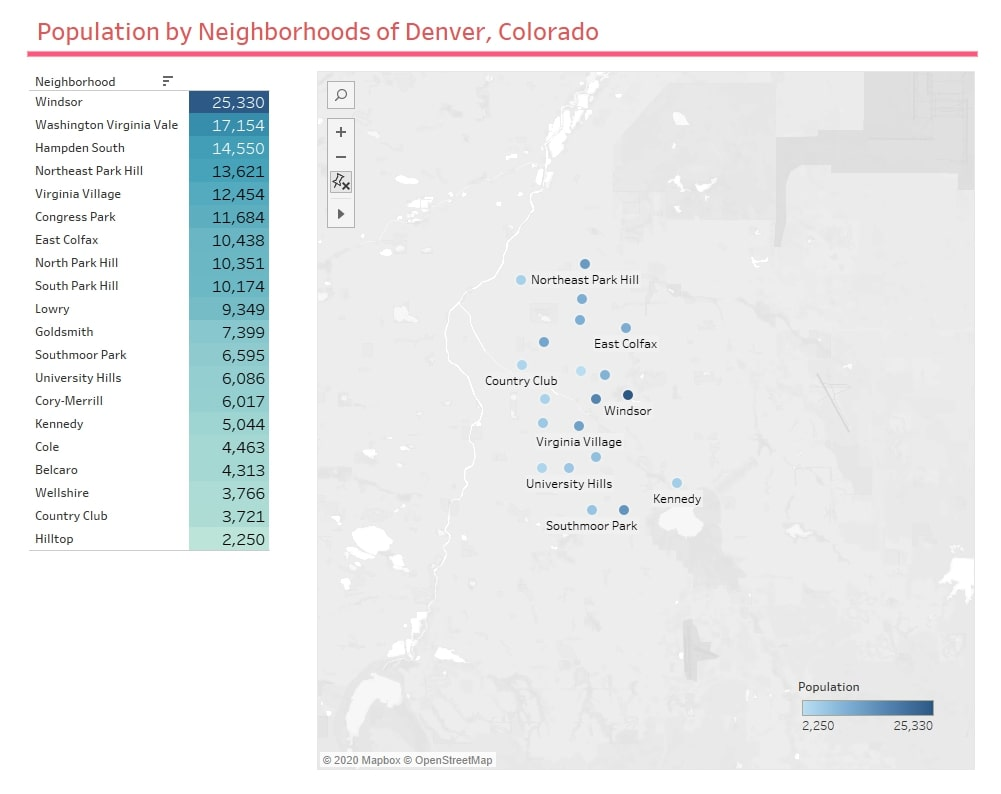

In [440]:
# I upload my Tableau Dashboard
from IPython.display import Image
img = 'Denver_windsor.jpg'
Image(filename=img)

According to data, Windsor is the most populated neighborhood between. Therefore, according to all those considerations, as a final decision, I would prefer to build a new Shopping Mall in Windsor, Denver. 

#  Thank you,

## Created by Cansu Mericli